# Data Analysis on Marketing Dataset PART2

<img src="img/0.png" style="max-width: 400px; height: auto; "></img>

### Import library

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import update
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Inspired from stackoverflow.com/questions/25239958
from sklearn.base import BaseEstimator, TransformerMixin
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

print("current pandas version: " + pd.__version__)
print("current scikit-learn version: " + sklearn.__version__)
print("current seaborn version: " + sns.__version__)

current pandas version: 1.0.3
current scikit-learn version: 0.22.2.post1
current seaborn version: 0.10.0


In [2]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# import os

# import numpy as np
# import pandas as pd
# import update

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_colwidth', 1000)

# print("current pandas version: " + pd.__version__)

### Load cmpn Dataset

In [3]:
cmpn = pd.read_pickle('./data/cmpn.pkl')
cmpn.shape

(41189, 17)

In [4]:
cmpn.head(2)

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
0,44715,52.0,blue-collar,married,basic.6y,,yes,no,cellular,108,2,999,nonexistent,no,1.800000,2008-08-02,200808
1,62194,31.0,management,married,university.degree,no,yes,no,telephone,422,5,999,nonexistent,no,7.033333,2008-06-03,200806


## Task1: Check column distribution

In [5]:
# Display columns
print(cmpn.columns.tolist())

['cust_id', 'age', 'job', 'marital', 'education', 'default', 'mortgage', 'loan', 'contact_type', 'duration', 'contact_num', 'p_days', 'p_outcome', 'y', 'duration_mins', 'date', 'yrmth']


In [6]:
# Check column type
cmpn.dtypes

cust_id                   int64
age                     float64
job                      object
marital                  object
education                object
default                  object
mortgage                 object
loan                     object
contact_type             object
duration                  int64
contact_num               int64
p_days                    int64
p_outcome                object
y                        object
duration_mins           float64
date             datetime64[ns]
yrmth                    object
dtype: object

In [7]:
# Distribution of numerical columns
cmpn.describe().astype(int)

,cust_id,age,duration,contact_num,p_days,duration_mins
count,41189,40689,41189,41189,41189,41189
mean,49881,40,258,2,962,4
std,28870,10,259,2,186,4
min,2,17,0,1,0,0
25%,24897,32,102,1,999,1
50%,49667,38,180,2,999,3
75%,74895,47,319,3,999,5
max,99999,98,4918,56,999,81


In [8]:
# Distribution of categorical variables
cmpn.job.value_counts(dropna=False)

admin.           10422
blue-collar       9255
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
                   330
Name: job, dtype: int64

#### Create numerical and categorical variable list

In [9]:
col_type = cmpn.dtypes
col_type

cust_id                   int64
age                     float64
job                      object
marital                  object
education                object
default                  object
mortgage                 object
loan                     object
contact_type             object
duration                  int64
contact_num               int64
p_days                    int64
p_outcome                object
y                        object
duration_mins           float64
date             datetime64[ns]
yrmth                    object
dtype: object

In [10]:
var_cat = col_type[col_type=='object'].index.tolist()
print(var_cat)

['job', 'marital', 'education', 'default', 'mortgage', 'loan', 'contact_type', 'p_outcome', 'y', 'yrmth']


In [11]:
var_num = col_type[col_type!='object'].index.tolist()
print(var_num)

['cust_id', 'age', 'duration', 'contact_num', 'p_days', 'duration_mins', 'date']


In [12]:
type(col_type[col_type!='object'])

pandas.core.series.Series

In [13]:
var_key = ['cust_id','date','yrmth']
var_key

['cust_id', 'date', 'yrmth']

In [14]:
# var_num - var_key
# https://stackoverflow.com/questions/3428536/python-list-subtraction-operation
var_num = [item for item in var_num if item not in var_key]
print(var_num, len(var_num))
var_cat = [item for item in var_cat if item not in var_key]
print(var_cat, len(var_cat))

['age', 'duration', 'contact_num', 'p_days', 'duration_mins'] 5
['job', 'marital', 'education', 'default', 'mortgage', 'loan', 'contact_type', 'p_outcome', 'y'] 9


In [15]:
# Get categorical variable distribution
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(cmpn[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - job:
admin.           10422
blue-collar       9255
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
                   330
Name: job, dtype: int64
-------------------------------------------------------

1 - marital:
married     24929
single      11568
divorced     4612
               80
Name: marital, dtype: int64
-------------------------------------------------------

2 - education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2293
NaN                     1731
illiterate                18
Name: education, dtype: int64
-------------------------------------------------------

3 - default:
no     32588
        8598
yes        3
Name: default, dtype: int64
--------------------------------------------------

## Task 2: Find the longest phone call record for each month

In [16]:
# sort data by yrmth (ascending order) then duration(descending order)
cmpn = cmpn.sort_values(by=['yrmth','duration'],ascending=[True,False])

In [17]:
cmpn.head()

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
15513,62371,37.0,unemployed,married,professional.course,no,yes,no,telephone,3631,2,999,nonexistent,yes,60.516667,2008-05-30,200805
36451,27256,39.0,self-employed,married,basic.4y,,yes,no,telephone,3366,3,999,nonexistent,no,56.100000,2008-05-09,200805
38638,58930,30.0,self-employed,married,basic.9y,no,no,no,telephone,3094,2,999,nonexistent,yes,51.566667,2008-05-02,200805
34615,28278,42.0,management,married,basic.6y,,yes,no,telephone,3078,4,999,nonexistent,no,51.300000,2008-05-29,200805
9780,18932,35.0,student,single,high.school,no,no,yes,telephone,2680,1,999,nonexistent,yes,44.666667,2008-05-12,200805


In [18]:
# Get first record for each yrmth 
res = cmpn.drop_duplicates(subset='yrmth', keep='first')
res.shape

(26, 17)

In [19]:
cmpn.groupby('yrmth').head(1)

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
15513,62371,37.0,unemployed,married,professional.course,no,yes,no,telephone,3631,2,999,nonexistent,yes,60.516667,2008-05-30,200805
30031,83650,58.0,retired,married,high.school,no,yes,no,telephone,3183,2,999,nonexistent,yes,53.050000,2008-06-24,200806
7862,43355,31.0,technician,married,professional.course,no,no,no,cellular,3643,1,999,nonexistent,yes,60.716667,2008-07-09,200807
1227,94202,52.0,blue-collar,married,basic.4y,no,no,no,telephone,4199,3,999,nonexistent,yes,69.983333,2008-08-05,200808
29646,76052,27.0,blue-collar,single,professional.course,no,yes,no,telephone,3284,1,999,nonexistent,no,54.733333,2008-10-22,200810
33315,58184,33.0,technician,single,professional.course,no,yes,no,telephone,4918,1,999,nonexistent,no,81.966667,2008-11-13,200811
24886,99947,48.0,admin.,married,high.school,no,yes,yes,telephone,291,1,999,nonexistent,no,4.850000,2008-12-26,200812
19821,36078,28.0,self-employed,single,university.degree,no,yes,yes,cellular,3076,1,999,nonexistent,yes,51.266667,2009-03-02,200903
13670,75336,40.0,housemaid,married,basic.6y,,,,cellular,2926,2,999,nonexistent,yes,48.766667,2009-04-06,200904
6128,87813,28.0,blue-collar,married,basic.9y,no,yes,no,cellular,3509,2,3,success,no,58.483333,2009-05-15,200905


In [20]:
res.head()

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
15513,62371,37.0,unemployed,married,professional.course,no,yes,no,telephone,3631,2,999,nonexistent,yes,60.516667,2008-05-30,200805
30031,83650,58.0,retired,married,high.school,no,yes,no,telephone,3183,2,999,nonexistent,yes,53.050000,2008-06-24,200806
7862,43355,31.0,technician,married,professional.course,no,no,no,cellular,3643,1,999,nonexistent,yes,60.716667,2008-07-09,200807
1227,94202,52.0,blue-collar,married,basic.4y,no,no,no,telephone,4199,3,999,nonexistent,yes,69.983333,2008-08-05,200808
29646,76052,27.0,blue-collar,single,professional.course,no,yes,no,telephone,3284,1,999,nonexistent,no,54.733333,2008-10-22,200810


In [21]:
# Check unique yrmth
print(len(res.yrmth.unique()))
print(len(res.yrmth.value_counts().index))

26
26


## Task 3 Data Cleaning to remove and impute missing values

In [22]:
cmpn = pd.read_pickle('./data/cmpn.pkl')
cmpn.shape

(41189, 17)

#### a Remove Duplicates

In [23]:
# Drop duplicated records
cmpn = cmpn.drop_duplicates()

In [24]:
cmpn.shape

(41188, 17)

#### b Check Missing Values

In [25]:
# show data summary in a print format
cmpn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cust_id        41188 non-null  int64         
 1   age            40688 non-null  float64       
 2   job            41188 non-null  object        
 3   marital        41188 non-null  object        
 4   education      39457 non-null  object        
 5   default        41188 non-null  object        
 6   mortgage       41188 non-null  object        
 7   loan           41188 non-null  object        
 8   contact_type   41188 non-null  object        
 9   duration       41188 non-null  int64         
 10  contact_num    41188 non-null  int64         
 11  p_days         41188 non-null  int64         
 12  p_outcome      41188 non-null  object        
 13  y              41088 non-null  object        
 14  duration_mins  41188 non-null  float64       
 15  date           4118

In [26]:
# Check missing for every element, return True if missing 
cmpn.isnull().head()

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
cmpn.isnull().shape

(41188, 17)

In [28]:
# Check if the entire dataset has any NA values
cmpn.isnull().any(axis=None)

True

In [29]:
# Check missing for each column
cmpn.isnull().any(axis=0)

cust_id          False
age               True
job              False
marital          False
education         True
default          False
mortgage         False
loan             False
contact_type     False
duration         False
contact_num      False
p_days           False
p_outcome        False
y                 True
duration_mins    False
date             False
yrmth            False
dtype: bool

In [30]:
# Check missing for each observation
cmpn.isnull().any(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [31]:
# Check number of missing values for each column
cmpn.isnull().sum(axis=0)

cust_id             0
age               500
job                 0
marital             0
education        1731
default             0
mortgage            0
loan                0
contact_type        0
duration            0
contact_num         0
p_days              0
p_outcome           0
y                 100
duration_mins       0
date                0
yrmth               0
dtype: int64

#### Detect missing values for categorical variables

In [32]:
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(cmpn[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
                   330
Name: job, dtype: int64
-------------------------------------------------------

1 - marital:
married     24928
single      11568
divorced     4612
               80
Name: marital, dtype: int64
-------------------------------------------------------

2 - education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
NaN                     1731
illiterate                18
Name: education, dtype: int64
-------------------------------------------------------

3 - default:
no     32588
        8597
yes        3
Name: default, dtype: int64
--------------------------------------------------

In [33]:
var_key

['cust_id', 'date', 'yrmth']

In [34]:
cmpn.yrmth.value_counts(dropna=False)

200805    7763
200807    6685
200905    5794
200808    5175
200806    4374
200811    3616
200904    2458
200908     770
200906     715
200910     447
200911     357
201007     311
201009     303
200903     282
200909     267
201003     264
201008     233
201006     229
201005     212
201010     204
200907     178
201004     174
200912     172
201011     128
200810      67
200812      10
Name: yrmth, dtype: int64

#### Set empty strings "" as NA values

In [35]:
for var in var_cat:
    cmpn.loc[cmpn[var]=='', var] = np.nan

#### Missing summary

In [36]:
MissingSummary = pd.concat([cmpn.dtypes, cmpn.isnull().any(axis=0), cmpn.isnull().sum(axis=0)], 
                           axis=1)
MissingSummary.columns = ['FeatureType','IsMissing', 'MissingCnt']
MissingSummary

,FeatureType,IsMissing,MissingCnt
cust_id,int64,False,0
age,float64,True,500
job,object,True,330
marital,object,True,80
education,object,True,1731
default,object,True,8597
mortgage,object,True,990
loan,object,True,990
contact_type,object,False,0
duration,int64,False,0


#### c How to deal with Missing Data

#### option 1: get rid of the rows if any feature is missing

In [37]:
cmpn.shape

(41188, 17)

In [38]:
# Get rid of customer record if the corresponding y is missing.
cmpn.dropna(subset=['y']).shape

(41088, 17)

In [39]:
cmpn = cmpn.dropna(subset=['y'])

In [40]:
cmpn.tail()

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
41183,56044,32.0,blue-collar,single,basic.9y,no,yes,no,cellular,282,1,999,nonexistent,yes,4.700000,2009-08-30,200908
41184,24556,42.0,blue-collar,married,high.school,no,no,yes,telephone,1297,3,999,nonexistent,yes,21.616667,2008-05-11,200805
41185,15097,54.0,technician,married,high.school,no,yes,no,cellular,178,5,999,nonexistent,no,2.966667,2009-04-26,200904
41186,2365,37.0,technician,married,university.degree,no,no,no,cellular,219,2,999,nonexistent,no,3.650000,2009-05-14,200905
41187,23349,40.0,blue-collar,married,basic.6y,NaN,yes,no,telephone,534,1,999,nonexistent,no,8.900000,2009-04-20,200904


In [41]:
# reset index
cmpn = cmpn.reset_index(drop=True)

In [42]:
cmpn.tail()

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
41083,56044,32.0,blue-collar,single,basic.9y,no,yes,no,cellular,282,1,999,nonexistent,yes,4.700000,2009-08-30,200908
41084,24556,42.0,blue-collar,married,high.school,no,no,yes,telephone,1297,3,999,nonexistent,yes,21.616667,2008-05-11,200805
41085,15097,54.0,technician,married,high.school,no,yes,no,cellular,178,5,999,nonexistent,no,2.966667,2009-04-26,200904
41086,2365,37.0,technician,married,university.degree,no,no,no,cellular,219,2,999,nonexistent,no,3.650000,2009-05-14,200905
41087,23349,40.0,blue-collar,married,basic.6y,NaN,yes,no,telephone,534,1,999,nonexistent,no,8.900000,2009-04-20,200904


#### option 2: Get rid of the whole attribute.

In [43]:
cmpn.shape

(41088, 17)

In [44]:
cmpn.drop('default', axis=1).shape

(41088, 16)

In [45]:
# Get rid of attributes with more than 20% missing value

In [46]:
MissingSummary

,FeatureType,IsMissing,MissingCnt
cust_id,int64,False,0
age,float64,True,500
job,object,True,330
marital,object,True,80
education,object,True,1731
default,object,True,8597
mortgage,object,True,990
loan,object,True,990
contact_type,object,False,0
duration,int64,False,0


In [47]:
DropColumn = MissingSummary[(MissingSummary.MissingCnt/cmpn.shape[0]>0.2)].index.tolist()
DropColumn

['default']

In [48]:
cmpn = cmpn.drop(DropColumn, axis=1)

In [49]:
cmpn.shape

(41088, 16)

#### option3: Missing value imputation.<br>
Set the values to some value (zero, the mean, the median, etc.).

In [50]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

In [51]:
# Create a SimpleImputer object with strategy = 'median'
imputer = SimpleImputer(strategy="median")

In [52]:
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [53]:
type(imputer)

sklearn.impute._base.SimpleImputer

In [54]:
# Select the numerical columns only
cmpn_num = cmpn[var_num]
mindex = cmpn_num[cmpn_num.age.isna()].head().index
cmpn_num[cmpn_num.age.isna()].head()

,age,duration,contact_num,p_days,duration_mins
44,NaN,165,4,999,2.750000
65,NaN,5,1,999,0.083333
257,NaN,1307,1,999,21.783333
336,NaN,97,2,999,1.616667
547,NaN,59,1,999,0.983333


In [55]:
# impute missing values with column median
X = imputer.fit_transform(cmpn_num)

In [56]:
X

array([[ 52.        , 108.        ,   2.        , 999.        ,
          1.8       ],
       [ 31.        , 422.        ,   5.        , 999.        ,
          7.03333333],
       [ 36.        , 107.        ,  13.        , 999.        ,
          1.78333333],
       ...,
       [ 54.        , 178.        ,   5.        , 999.        ,
          2.96666667],
       [ 37.        , 219.        ,   2.        , 999.        ,
          3.65      ],
       [ 40.        , 534.        ,   1.        , 999.        ,
          8.9       ]])

In [57]:
X.shape

(41088, 5)

In [58]:
imputer.statistics_

array([ 38., 180.,   2., 999.,   3.])

In [59]:
# manually calculate the median for each column
cmpn_num.median().values

array([ 38., 180.,   2., 999.,   3.])

In [60]:
# Add back columns name
cmpn_num_df = pd.DataFrame(X, columns=cmpn_num.columns)

In [61]:
# Validate
cmpn_num_df.loc[mindex]

,age,duration,contact_num,p_days,duration_mins
44,38.0,165.0,4.0,999.0,2.750000
65,38.0,5.0,1.0,999.0,0.083333
257,38.0,1307.0,1.0,999.0,21.783333
336,38.0,97.0,2.0,999.0,1.616667
547,38.0,59.0,1.0,999.0,0.983333


Most Frequent Imputer

In [62]:
# Only select categorical variable

In [63]:
var_cat

['job',
 'marital',
 'education',
 'default',
 'mortgage',
 'loan',
 'contact_type',
 'p_outcome',
 'y']

In [64]:
# Remove default from var_cat
var_cat = [item for item in var_cat if item not in ['default']]
cmpn_cat = cmpn[var_cat]

In [65]:
# Show some missing records
mindex = cmpn_cat[cmpn_cat.isnull().any(axis='columns')].head().index
cmpn_cat[cmpn_cat.isnull().any(axis='columns')].head()

,job,marital,education,mortgage,loan,contact_type,p_outcome,y
13,services,married,high.school,NaN,NaN,cellular,nonexistent,no
17,unemployed,married,NaN,yes,no,telephone,nonexistent,no
34,blue-collar,married,NaN,no,no,cellular,failure,no
62,NaN,married,NaN,no,no,telephone,nonexistent,no
70,student,divorced,NaN,no,no,telephone,nonexistent,no


In [66]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [67]:
# Create MostFrequentImputer object
MI = MostFrequentImputer()

In [68]:
type(MI)

__main__.MostFrequentImputer

In [69]:
# Calculate the most frequent item for each column
MI.fit(cmpn_cat)

MostFrequentImputer()

In [70]:
# Impute missing value
cmpn_cat_df = MI.transform(cmpn_cat)
cmpn_cat_df.loc[mindex]

,job,marital,education,mortgage,loan,contact_type,p_outcome,y
13,services,married,high.school,yes,no,cellular,nonexistent,no
17,unemployed,married,university.degree,yes,no,telephone,nonexistent,no
34,blue-collar,married,university.degree,no,no,cellular,failure,no
62,admin.,married,university.degree,no,no,telephone,nonexistent,no
70,student,divorced,university.degree,no,no,telephone,nonexistent,no


#### d Data Concatenation

In [71]:
cmpn = pd.concat([cmpn[var_key],cmpn_num_df,cmpn_cat_df], axis=1)[cmpn.columns]

In [72]:
# Check if the entire dataset has any NA values
cmpn.isnull().any(axis=None)

False

In [73]:
cmpn.shape

(41088, 16)

In [74]:
cmpn.head()

,cust_id,age,job,marital,education,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
0,44715,52.0,blue-collar,married,basic.6y,yes,no,cellular,108.0,2.0,999.0,nonexistent,no,1.800000,2008-08-02,200808
1,62194,31.0,management,married,university.degree,yes,no,telephone,422.0,5.0,999.0,nonexistent,no,7.033333,2008-06-03,200806
2,25436,36.0,entrepreneur,married,university.degree,yes,no,cellular,107.0,13.0,999.0,nonexistent,no,1.783333,2008-07-16,200807
3,39633,44.0,blue-collar,married,basic.4y,yes,no,cellular,311.0,1.0,999.0,nonexistent,no,5.183333,2008-07-15,200807
4,92803,32.0,admin.,married,university.degree,yes,yes,cellular,51.0,1.0,999.0,nonexistent,no,0.850000,2008-11-09,200811


## Task 4 Check if response rate has any seasonality 

In [75]:
# Add month column
cmpn['month'] = cmpn.date.dt.month
cmpn.month.value_counts()

5     13733
7      7150
8      6168
6      5307
11     4095
4      2626
10      713
9       570
3       544
12      182
Name: month, dtype: int64

In [76]:
# Number of contact by month and y
res = cmpn.pivot_table(values='cust_id', index='month', columns='y', aggfunc='count', margins=True)
res

y,no,yes,All
month,,,
3,268,276,544
4,2088,538,2626
5,12849,884,13733
6,4748,559,5307
7,6503,647,7150
8,5516,652,6168
9,314,256,570
10,400,313,713
11,3680,415,4095


In [77]:
# Add response rate
res['response_rate'] = res.yes / res.All
res

y,no,yes,All,response_rate
month,,,,
3,268,276,544,0.507353
4,2088,538,2626,0.204874
5,12849,884,13733,0.064370
6,4748,559,5307,0.105333
7,6503,647,7150,0.090490
8,5516,652,6168,0.105707
9,314,256,570,0.449123
10,400,313,713,0.438990
11,3680,415,4095,0.101343


In [78]:
# Remove "all" row and sort by response rate (descending)
res1 = res.iloc[:-1,:].sort_values(by='response_rate', ascending=False)
res1

y,no,yes,All,response_rate
month,,,,
3,268,276,544,0.507353
12,93,89,182,0.489011
9,314,256,570,0.449123
10,400,313,713,0.438990
4,2088,538,2626,0.204874
8,5516,652,6168,0.105707
6,4748,559,5307,0.105333
11,3680,415,4095,0.101343
7,6503,647,7150,0.090490


In [79]:
# Extract "all" row
res2 = res.iloc[-1:,:]
res2

y,no,yes,All,response_rate
month,,,,
All,36459,4629,41088,0.112661


In [80]:
# concatenate res1 and res2
pd.concat([res1,res2], axis=0)

y,no,yes,All,response_rate
month,,,,
3,268,276,544,0.507353
12,93,89,182,0.489011
9,314,256,570,0.449123
10,400,313,713,0.438990
4,2088,538,2626,0.204874
8,5516,652,6168,0.105707
6,4748,559,5307,0.105333
11,3680,415,4095,0.101343
7,6503,647,7150,0.090490


## Task 5 Discover and Visualize the Data to Gain Insights

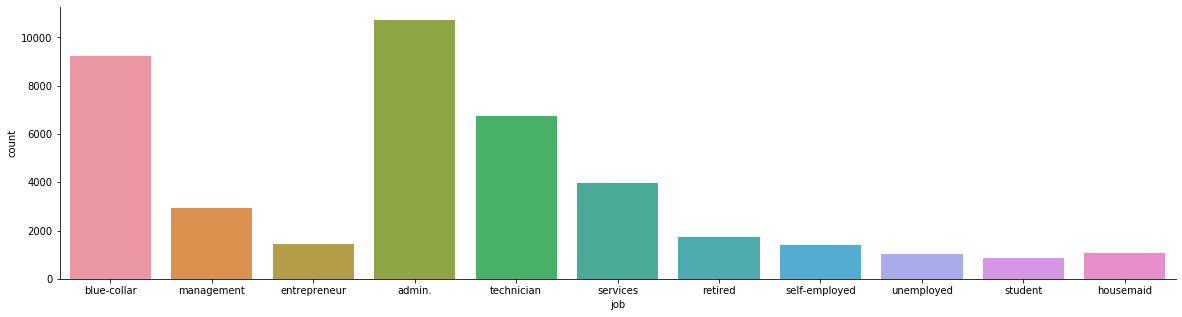

In [81]:
plt.subplots(figsize=(20,5))
sns.countplot(x = 'job', data = cmpn)
sns.despine() # try to see the difference without running sns.despine()

In [82]:
# Add chart title, xlabel and ylabel

# fig, ax1 = plt.subplots(figsize=(20,5))
# sns.countplot(x = 'job', data = cmpn, ax = ax1)
# ax1.set_xlabel('Job', fontsize=15)
# ax1.set_ylabel('Count', fontsize=15)
# ax1.set_title('Job Count Distribution', fontsize=15)
# ax1.tick_params(labelsize=15)
# sns.despine()

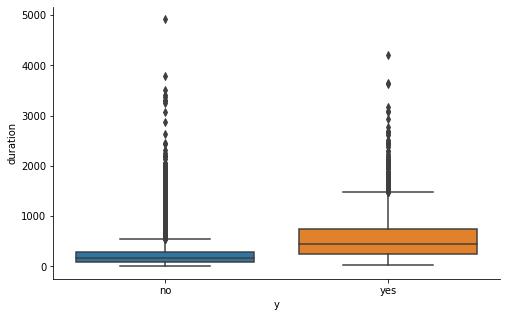

In [83]:
plt.subplots(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=cmpn)
sns.despine()

In [84]:
# fig, ax1= plt.subplots(figsize=(8,5))
# sns.boxplot(x='y', y='duration', data=cmpn, ax=ax1)
# ax1.set_xlabel('y', fontsize=15)
# ax1.set_ylabel('Duration', fontsize=15)
# ax1.set_title('Duration Distribution', fontsize=15)
# ax1.tick_params(labelsize=15)
# sns.despine()

## Task 6 - Predict who is more likely to respond the campaign

### Dataset Preparation

In [85]:
cmpn.head(1)

,cust_id,age,job,marital,education,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth,month
0,44715,52.0,blue-collar,married,basic.6y,yes,no,cellular,108.0,2.0,999.0,nonexistent,no,1.8,2008-08-02,200808,8


In [86]:
cmpn.shape

(41088, 17)

In [87]:
df = cmpn.copy()

In [88]:
# Change the outcome to binary, i.e. 0 and 1
df.loc[df.y=='no','y'] = 0
df.loc[df.y=='yes','y'] = 1
df['y'] = df.y.astype('int64')
df.y.value_counts()

0    36459
1     4629
Name: y, dtype: int64

#### Categorical variable processing: One-hot encoding

In [89]:
# response rate by different categorical variables
for var in ['month']+var_cat[:-1]:
    df1 = pd.crosstab(cmpn[var], cmpn.y, margins= True)
    df1.reset_index(inplace = True)
    df1.columns.name = ''
    df1['num_contact'] = df1.no + df1.yes
    df1['response_rate'] = df1.yes / df1.num_contact
    df1 = df1[[var, 'num_contact', 'response_rate']]
    df1.sort_values(by='response_rate', ascending=False, inplace=True)
    print(str(var) + ":")
    print(df1)
    print('-------------------------------------------------------------------------')

month:
   month  num_contact  response_rate
0      3          544       0.507353
9     12          182       0.489011
6      9          570       0.449123
7     10          713       0.438990
1      4         2626       0.204874
10   All        41088       0.112661
5      8         6168       0.105707
3      6         5307       0.105333
8     11         4095       0.101343
4      7         7150       0.090490
2      5        13733       0.064370
-------------------------------------------------------------------------
job:
              job  num_contact  response_rate
8         student          873       0.313860
5         retired         1715       0.253061
10     unemployed         1012       0.142292
0          admin.        10722       0.128987
11            All        41088       0.112661
4      management         2917       0.112444
9      technician         6725       0.108401
6   self-employed         1417       0.105152
3       housemaid         1057       0.100284
2    entre

In [90]:
df.loc[df.month.isin([3,9,10,12]),'seasonality'] = 1
df.loc[~df.month.isin([3,9,10,12]),'seasonality'] = 0
df.loc[:,'seasonality'] = df.seasonality.astype('int64')
print(df.seasonality.value_counts(dropna=False))
print(df.seasonality.dtypes)

0    39079
1     2009
Name: seasonality, dtype: int64
int64


In [91]:
# One-hot encoding
df.loc[df.job=='student','student'] = 1
df.loc[df.job!='student','student'] = 0
df.loc[:,'student'] = df.student.astype('int64')
print(df.student.value_counts(dropna=False))
print(df.student.dtypes)

0    40215
1      873
Name: student, dtype: int64
int64


In [92]:
df.loc[df.job=='retired','retired'] = 1
df.loc[~(df.job=='retired'),'retired'] = 0
df.loc[:,'retired'] = df.retired.astype('int64')
print(df.retired.value_counts(dropna=False))
print(df.retired.dtypes)

0    39373
1     1715
Name: retired, dtype: int64
int64


In [93]:
# student = 1 retired = 0
# student = 0 retired = 1
# student = 0 retired = 0

In [94]:
df.loc[df.p_outcome=='success','success'] = 1
df.loc[df.p_outcome!='success','success'] = 0
df.loc[:,'success'] = df.success.astype('int64')
print(df.success.value_counts(dropna=False))
print(df.success.dtypes)

0    39718
1     1370
Name: success, dtype: int64
int64


#### Split data into predictors and outcome

In [95]:
X = df[['student','retired','seasonality','success',
         'age','duration','contact_num','p_days']]
y = df.y

#### Train Test Split

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=824)

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32870, 8) (32870,)
(8218, 8) (8218,)


### Model Fitting - Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=7, random_state=824)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=824,
                       verbose=0, warm_start=False)

#### Feature Importance

In [99]:
for name, importance in zip(X_train.columns.tolist(), rf_clf.feature_importances_):
    print('%s = %.3f' %(name, importance))

student = 0.012
retired = 0.009
seasonality = 0.125
success = 0.100
age = 0.071
duration = 0.473
contact_num = 0.016
p_days = 0.194


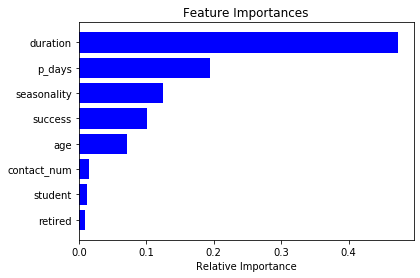

In [100]:
features = X_train.columns.tolist()
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Model Evaluation

In [101]:
print("RF train accuracy: %0.3f" % rf_clf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf_clf.score(X_test, y_test))

RF train accuracy: 0.909
RF test accuracy: 0.903


In [102]:
from sklearn.metrics import roc_auc_score
print('RF train AUC : %s' % roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]))
print('RF test AUC: %s' % roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

RF train AUC : 0.9069435903250207
RF test AUC: 0.8990467464560981
